In [160]:
import numpy as np
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy import stats
import itertools as it

# from acquire import getData
import acquire as acq
import prepare
import eda

In [2]:
df_iris = data('iris')
df_iris.head(3)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [3]:
df_iris.shape

(150, 5)

In [4]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
#ALT
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
df_iris.describe()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df_excel = pd.read_csv('Telco_plus.csv')
df_excel.head(2)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.3,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.4,No,9.1


In [9]:
df_excel_sample = df_excel.head(100) 
# df2 = df_excel.iloc[:100,:] #ALT


In [10]:
#number of rows in original dataframe
df_excel.shape[0]

7049

In [11]:
#first 5 columns
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [12]:
#print columns that are objects
for i in df_excel.columns:
    if df_excel[i].dtype == object: print(i)

customer_id
gender
partner
dependents
payment_type
churn


In [13]:
#ALT print column objects
df_excel.select_dtypes(object).columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [14]:
#Calculate range for numeric variables (doing all int/float, not filtering out those that are actually categories)
for i in df_excel.columns:
    if df_excel[i].dtype == int or df_excel[i].dtype == float:
        rng = df_excel[i].max() - df_excel[i].min()
        print(f'{i} range: {rng}')


is_senior_citizen range: 1
phone_service range: 2
internet_service range: 2
contract_type range: 2
monthly_charges range: 100.5
total_charges range: 8666.0
tenure range: 79.3


In [15]:
#ALT way to get range:
df_excel.select_dtypes(include=[int,float]).max()-df_excel.select_dtypes(include=[int,float]).min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
tenure                 79.3
dtype: float64

In [16]:
#From Google Sheets
url="https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"
url = url.replace('edit#gid=','export?format=csv&gid=')
df_google = pd.read_csv(url)
df_google.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
df_google.shape

(891, 12)

In [18]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
cats = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for i in cats:
    print(f'{i} categories: {df_google[i].unique()}')

Survived categories: [0 1]
Pclass categories: [3 1 2]
Sex categories: ['male' 'female']
SibSp categories: [1 0 3 4 2 5 8]
Parch categories: [0 1 2 5 3 4 6]
Embarked categories: ['S' 'C' 'Q' nan]


## Preparation Exercises

### Titanic Dataset

In [21]:
df = df_backup = acq.getData('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [22]:
print(pd.crosstab(df['class'],df.pclass))  #same info, we can drop one
print(f'\n{pd.crosstab(df.parch,df.alone)}')
#Alone flag numbers don't seem to align with sibsp or parch.  
#Would check if related to only 1 passenger per cabin number 
# - but this dataset doesn't contain the cabin number

pclass    1    2    3
class                
First   216    0    0
Second    0  184    0
Third     0    0  491

alone    0    1
parch          
0      141  537
1      118    0
2       80    0
3        5    0
4        4    0
5        5    0
6        1    0


In [23]:
pd.crosstab(df.embarked,df.embark_town) #duplicate columns

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


In [24]:
df.drop_duplicates(inplace=True)
df.shape #no duplicates

(891, 13)

#### Gather our takeaways, i.e., what we are going to do when we clean:
- Target: want to predict survival
- Cleaning to do:
  - Drop pclass: duplicate Data, but want pclass column name and class's categorical values
  - Drop passenger_id: only would be valuable as it relates to other attributes
  - Drop embarked or embarked_town, they are duplicates
  - Drop Deck, it is ~70% nulls

- To consider further: age has a few nulls

In [25]:
df.drop(inplace=True,columns=['pclass','passenger_id','embarked','deck'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          714 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   class        891 non-null    object 
 7   embark_town  889 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


#### Nulls (round 1)
- drop rows with 2 embark nulls
- age nulls should wait as we want to fill them in after splitting 

In [27]:
df.dropna(subset=['embark_town']).info() 
#awesome, works by just dropping rows with null in embark

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   sex          889 non-null    object 
 2   age          712 non-null    float64
 3   sibsp        889 non-null    int64  
 4   parch        889 non-null    int64  
 5   fare         889 non-null    float64
 6   class        889 non-null    object 
 7   embark_town  889 non-null    object 
 8   alone        889 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [28]:
df.dropna(subset=['embark_town'],inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   sex          889 non-null    object 
 2   age          712 non-null    float64
 3   sibsp        889 non-null    int64  
 4   parch        889 non-null    int64  
 5   fare         889 non-null    float64
 6   class        889 non-null    object 
 7   embark_town  889 non-null    object 
 8   alone        889 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


#### Encoding
- Sex and embarkation town


In [30]:
d_df = pd.get_dummies(df[['embark_town','sex','class']],drop_first=[True, True])
d_df.head(2)

,embark_town_Queenstown,embark_town_Southampton,sex_male,class_Second,class_Third
0,0,1,1,0,1
1,0,0,0,0,0


In [31]:
#concat dummy df to dataframe
df = pd.concat([df,d_df],axis=1)
df.head(2)

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,class_Second,class_Third
0,0,male,22.0,1,0,7.2500,Third,Southampton,0,0,1,1,0,1
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0


In [32]:
#rename class just in case
df.rename(columns={'class':'pclass'},inplace=True)

#### Drop into a Function

In [33]:
def prep_titanic(df):
    #Drop un-needed columns
    df.drop(inplace=True,columns=['pclass','passenger_id','embarked','deck'])
    #Drop minimal nulls from embark town
    df.dropna(subset=['embark_town'],inplace=True)
    #Encode embark_town, sex and class >> concat
    d_df = pd.get_dummies(df[['embark_town','sex','class']],drop_first=[True, True])
    df = pd.concat([df,d_df],axis=1)
    #rename class just in case
    df.rename(columns={'class':'pclass'},inplace=True)
    return df

In [34]:
df = acq.getData('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [35]:
tr, te, val = prepare.prep_titanic(df)
tr.shape

/Users/caytschlichting/codeup-data-science/classification-exercises/prepare.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate['age'] = imputer.transform(validate[['age']])


(622, 14)

In [36]:
val.age

170    61.000000
546    19.000000
315    26.000000
613    29.850694
409    29.850694
         ...    
832    29.850694
856    45.000000
597    49.000000
594    37.000000
497    29.850694
Name: age, Length: 178, dtype: float64

#### Impute the age column

In [37]:
# imputer = SimpleImputer(strategy='mean')
# #fit train data to imputer, then transform train
# tr.age = imputer.fit_transform(tr.age)
# #transform test and validate
# te.age = imputer.transform(te.age)
# val.age = imputer.transform(val.age)

### Iris Dataset

In [38]:
idf = acq.getData('iris')

In [39]:
idf.info()
# no Nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [40]:
pd.crosstab(idf.species_id,idf.species_name)

species_name,setosa,versicolor,virginica
species_id,,,
1,50,0,0
2,0,50,0
3,0,0,50


In [41]:
idf.describe().T

,count,mean,std,min,25%,50%,75%,max
species_id,150.0,2.000000,0.819232,1.0,1.00,2.00,3.00,3.0
measurement_id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
sepal_length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5


(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

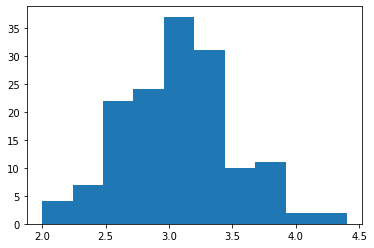

In [42]:
plt.hist(idf.sepal_width)

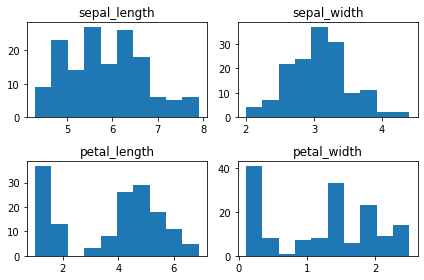

In [43]:
plt.figure()
ct = 0
for i in idf.columns[2:6]:
    ct +=1
    plt.subplot(2,2,ct)
    plt.hist(idf[i])
    plt.title(i)
plt.tight_layout()

##### Cleaning to do:
- No Nulls, so good there
- Outliers for sepal/petal length/width are fine
- TO DROP:
  - species_id (duplicate of species name)
  - measurement_id (primary key, don't need)

In [44]:
idf.drop(inplace=True,columns=['species_id','measurement_id'])
idf.shape

(150, 5)

In [45]:
idf.rename(columns={"species_name":"species"},inplace=True)

In [46]:
idf.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### Encode
- Encode species_name: but don't technically need to do this as the target

In [47]:
d_idf = pd.get_dummies(idf[['species']],drop_first=True)

In [48]:
d_idf.head(2)

,species_versicolor,species_virginica
0,0,0
1,0,0


In [49]:
idf = pd.concat([idf,d_idf],axis=1)

#### Drop into a function

In [50]:
def prep_iris(idf):
    #drop id columns:
    idf.drop(inplace=True,columns=['species_id','measurement_id'])
    #rename species column:
    idf.rename(columns={"species_name":"species"},inplace=True)
    #encode species:
    d_idf = pd.get_dummies(idf[['species']],drop_first=True)
    #concat to dataframe
    idf = pd.concat([idf,d_idf],axis=1)
    return idf

#### Test function

In [51]:
idf = acq.getData('iris')
idf.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa


In [52]:
idf = prep_iris(idf)
idf.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0


### Telco Dataset

In [53]:
df = acq.getData('telco')
df.head(2)

,customer_id,payment_type_id,contract_type_id,internet_service_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,signup_date
0,0002-ORFBO,2,2,1,Female,0,Yes,Yes,9,Yes,...,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check,2021-04-21 18:07:34
1,0003-MKNFE,2,1,1,Male,0,No,No,9,Yes,...,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check,2021-04-21 18:07:34


In [54]:
df.info() #no nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   internet_service_type_id  7043 non-null   int64  
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [55]:
df.describe()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.690473,1.872923,0.162147,32.371149,64.761692
std,1.148907,0.833755,0.737796,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,1.000000,2.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [56]:
pd.crosstab(df.payment_type_id,df.payment_type) #can drop type ID

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
payment_type_id,,,,
1,0,0,2365,0
2,0,0,0,1612
3,1544,0,0,0
4,0,1522,0,0


In [57]:
pd.crosstab(df.internet_service_type_id,df.internet_service_type) #can drop int ser type id

internet_service_type,DSL,Fiber optic,None
internet_service_type_id,,,
1,2421,0,0
2,0,3096,0
3,0,0,1526


In [58]:
pd.crosstab(df.contract_type_id, df.contract_type) #drop contract type id

contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1473,0
3,0,0,1695


In [59]:
df.customer_id #primary key, can drop

0       0002-ORFBO
1       0003-MKNFE
2       0004-TLHLJ
3       0011-IGKFF
4       0013-EXCHZ
           ...    
7038    9987-LUTYD
7039    9992-RRAMN
7040    9992-UJOEL
7041    9993-LHIEB
7042    9995-HOTOH
Name: customer_id, Length: 7043, dtype: object

In [60]:
df.iloc[:,9:18] #need to encode these, but also check for list of values

,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing
0,Yes,No,No,Yes,No,Yes,Yes,No,Yes
1,Yes,Yes,No,No,No,No,No,Yes,No
2,Yes,No,No,No,Yes,No,No,No,Yes
3,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes
4,Yes,No,No,No,No,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
7038,Yes,No,Yes,No,No,Yes,No,No,No
7039,Yes,Yes,No,No,No,No,No,Yes,Yes
7040,Yes,No,No,Yes,No,No,No,No,Yes
7041,Yes,No,Yes,No,Yes,Yes,No,Yes,No


In [61]:
for i in df.columns[9:18]:
    print(df[i].unique())
#no vs no * service is important, as it is saying the column doesn't apply.  
#Map phone service and paperless billing, encode the rest

['Yes' 'No']
['No' 'Yes' 'No phone service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No']


In [62]:
type(df.total_charges[0]) #convert total charges to float

str

In [63]:
df.total_charges.sort_values() #Looks like there are some nulls

2855          
3118          
3052          
5433          
1731          
         ...  
5868    997.75
4298     998.1
4173    999.45
3162     999.8
6421     999.9
Name: total_charges, Length: 7043, dtype: object

In [64]:
df.total_charges.sort_values().head(30) #about 10-15

2855           
3118           
3052           
5433           
1731           
4054           
2176           
2250           
945            
1906           
2025           
4386      100.2
2222     100.25
1771     100.35
5542      100.4
5126      100.8
3315      100.9
5762     1001.2
4983     1001.5
4764    1003.05
5844    1004.35
6261     1004.5
4907    1004.75
421      1005.7
2427     1006.9
2919     1007.8
5589     1007.9
3627    1008.55
3716     1008.7
5270     1008.7
Name: total_charges, dtype: object

In [65]:
df2 = df.total_charges.str.strip()

In [66]:
df2[df2 == ''] #there are some "nulls"!

945     
1731    
1906    
2025    
2176    
2250    
2855    
3052    
3118    
4054    
5433    
Name: total_charges, dtype: object

In [67]:
df2[df2 == ''].index #how to grab index values for dropping

Int64Index([945, 1731, 1906, 2025, 2176, 2250, 2855, 3052, 3118, 4054, 5433], dtype='int64')

In [68]:
df.shape

(7043, 25)

In [69]:
df.drop_duplicates().shape #no duplicates

(7043, 25)

In [70]:
df.churn.unique() #encode

array(['No', 'Yes'], dtype=object)

In [71]:
df.signup_date

0       2021-04-21 18:07:34
1       2021-04-21 18:07:34
2       2021-09-21 18:07:34
3       2020-12-21 18:07:34
4       2021-10-21 18:07:34
               ...         
7038    2020-12-21 18:07:34
7039    2020-03-21 18:07:34
7040    2021-11-21 18:07:34
7041    2016-06-21 18:07:34
7042    2016-10-21 18:07:34
Name: signup_date, Length: 7043, dtype: object

In [72]:
df.tenure #just keep this as opposed to signup_date

0        9
1        9
2        4
3       13
4        3
        ..
7038    13
7039    22
7040     2
7041    67
7042    63
Name: tenure, Length: 7043, dtype: int64

#### Cleaning to do:
- Total_Charges:
  - Drop rows w/ nulls in total_charges (strip, check for '', grab index)
  - Convert to float
- To Drop:
  - Payment type id, duplicate of payment type
  - Internet service type id, duplicate of internet service type
  - contract type id, duplicate of contract type
  - Customer id, is a primery key, can drop
  - signup_date, tenure is sufficient
- To Encode/Map:
  - Map yes/no:
      - phone_service, paperless_billing, partner, dependents, churn, 
  - Encode:
    - 'gender', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
  
  
  
  

In [73]:
drp_ind = df[df.total_charges.str.strip() == ''].index

In [74]:
df.shape

(7043, 25)

In [75]:
df.drop(index=drp_ind,inplace=True)

In [76]:
df.shape #dropped our 10-15 values

(7032, 25)

In [77]:
df.total_charges.sort_values() #awesome, don't see those nulls

4386     100.2
2222    100.25
1771    100.35
5542     100.4
5126     100.8
         ...  
5868    997.75
4298     998.1
4173    999.45
3162     999.8
6421     999.9
Name: total_charges, Length: 7032, dtype: object

In [78]:
df.total_charges = df.total_charges.astype(float)

In [79]:
df.total_charges.dtype #Total charges is ready!

dtype('float64')

In [80]:
#drop unnecessary columns
drp_col = ['payment_type_id','internet_service_type_id','contract_type_id','customer_id','signup_date']

In [81]:
df.drop(columns = drp_col,inplace=True)

In [82]:
df.shape #5 less columns

(7032, 20)

In [83]:
#map subset of variables that are yes/no
#phone_service, paperless_billing, partner, dependents, churn
df['has_phone'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['is_paperless'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['has_dependents'] = df.partner.map({'Yes': 1, 'No': 0})
df['has_partner'] = df.dependents.map({'Yes': 1, 'No': 0})
df['has_churned'] = df.churn.map({'Yes': 1, 'No': 0})

In [84]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'internet_service_type', 'contract_type', 'payment_type', 'has_phone',
       'is_paperless', 'has_dependents', 'has_partner', 'has_churned'],
      dtype='object')

In [85]:
#encode the other categories
enc_col = ['gender', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

In [86]:
d_df = pd.get_dummies(df[enc_col],drop_first=False)

In [87]:
df = pd.concat([df,d_df],axis=1)

In [88]:
df.shape #lots of columns!

(7032, 48)

In [89]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'internet_service_type', 'contract_type', 'payment_type', 'has_phone',
       'is_paperless', 'has_dependents', 'has_partner', 'has_churned',
       'gender_Female', 'gender_Male', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No', 'streaming_tv_No internet servi

#### Drop into a function!

In [90]:
def prep_telco(df):
    #HANDLE total_charge row:
    #grab the indices with null values
    drp_ind = df[df.total_charges.str.strip() == ''].index
    #drop those indices
    df.drop(index=drp_ind,inplace=True)
    #Convert the column to float
    df.total_charges = df.total_charges.astype(float)

    #DROP other unnecessary columns
    drp_col = ['payment_type_id','internet_service_type_id','contract_type_id','customer_id','signup_date']
    df.drop(columns = drp_col,inplace=True)

    #MAP subset of variables that are yes/no
    #phone_service, paperless_billing, partner, dependents, churn
    df['has_phone'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['is_paperless'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['has_dependents'] = df.partner.map({'Yes': 1, 'No': 0})
    df['has_partner'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['has_churned'] = df.churn.map({'Yes': 1, 'No': 0})   

    #ENCODE the other categorical columns
    enc_col = ['gender', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']  
    d_df = pd.get_dummies(df[enc_col],drop_first=False)
    #concate to df
    df = pd.concat([df,d_df],axis=1)

    return df

#### Test the function

In [91]:
df = acq.getData('telco')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   internet_service_type_id  7043 non-null   int64  
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [92]:
df = prep_telco(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   object 
 1   senior_citizen                         7032 non-null   int64  
 2   partner                                7032 non-null   object 
 3   dependents                             7032 non-null   object 
 4   tenure                                 7032 non-null   int64  
 5   phone_service                          7032 non-null   object 
 6   multiple_lines                         7032 non-null   object 
 7   online_security                        7032 non-null   object 
 8   online_backup                          7032 non-null   object 
 9   device_protection                      7032 non-null   object 
 10  tech_support                           7032 non-null   object 
 11  stre

#### Train, Test, and Split!
- Train: 70
- Test: 10
- Validate: 20

In [93]:
#split test/train and validate - this order makes the ratios easier 
#define the target variable
target = 'churn'
#test and validation percentages of WHOLE dataset
val_per = .2
test_per = .1
#Calculate percentage we need of test/train subset
tt_per = test_per/(1-val_per)

#returns train then test, so test_size is the second set it returns
tt, validate = train_test_split(df, test_size=val_per,random_state=88,stratify=df[target])
#now split tt in train and test want 70/10 so test_size = 1/8 or .125
train, test = train_test_split(tt, test_size=tt_per, random_state=88,stratify=tt[target])

In [94]:
train.shape

(4921, 48)

In [95]:
test.shape

(704, 48)

In [96]:
validate.shape

(1407, 48)

#### Drop into a split function

In [97]:
def splitData(df,target,**kwargs):
    ##ADD kwargs later that would allow you to specify a validation and test ratio
    #test and validation percentages of WHOLE dataset - UPDATE to handle kwargs
    val_per = .2
    test_per = .1

    #Calculate percentage we need of test/train subset
    tt_per = test_per/(1-val_per)

    #returns train, test \thereforeabs so test_size is the second set it returns
    tt, validate = train_test_split(df, test_size=val_per,random_state=88,stratify=df[target])
    #now split tt in train and test want 70/10 so test_size = 1/8 or .125
    train, test = train_test_split(tt, test_size=tt_per, random_state=88,stratify=tt[target])
    
    return train, test, validate

#### Test combined final prep function

In [98]:
import prepare


In [99]:
df = acq.getData('telco')
tr, te, val = prepare.prep_telco(df,val_ratio=.15)

In [100]:
tr.shape

(5273, 48)

In [101]:
te.shape

(704, 48)

In [102]:
val.shape

(1055, 48)

In [103]:
####Add some Histograms and check outliers!####

## Exploratory Data Analysis

### Part 1: Iris Dataset

In [104]:
df = acq.getData('iris')
tr, test, validate = prepare.prep_iris(df)
tr.shape

(105, 7)

#### Univariate Stats
- For each quantitative variable, create a histogram, boxplot & descriptive statistics
- For each categorical variable, create a frequency table & bar plot of freq
- Document takeaways and actions

versicolor    35
setosa        35
virginica     35
Name: species, dtype: int64


[Text(0.5, 1.0, 'Number of observations of each species')]

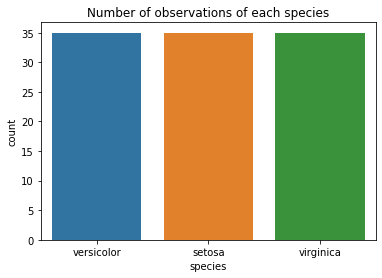

In [105]:
#USE tr for all of this!
#Start by looking at our categorical, target variable

#frequency as a table
print(tr.species.value_counts()) 

#on a bar plot using seaborn
sns.countplot(data=tr,x='species').set(title="Number of observations of each species")



<AxesSubplot:>

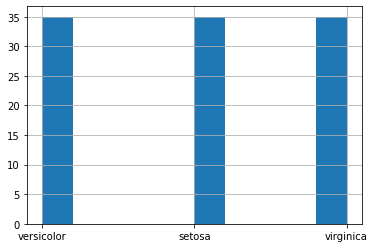

In [106]:
#on a bar plot using pandas/pyplot
tr.species.hist()
#less pretty, use seaborn

In [107]:
#Now look at our quantitative variables.
#First let's look at descriptive statistics for these
#filtered out tr so as not to see dummy columns of target variable
tr.iloc[:,0:5].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,105.0,5.833333,0.852335,4.3,5.1,5.8,6.4,7.9
sepal_width,105.0,3.040952,0.415261,2.0,2.8,3.0,3.3,4.0
petal_length,105.0,3.736190,1.795032,1.0,1.5,4.2,5.1,6.9
petal_width,105.0,1.184762,0.769838,0.1,0.3,1.3,1.8,2.5


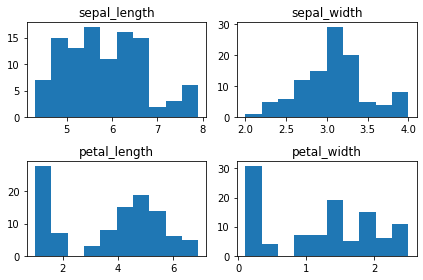

In [108]:
#Throw these on a histogram
plt.figure()
ct = 0
for i in tr.columns[0:4]:
    ct +=1
    plt.subplot(2,2,ct)
    plt.hist(tr[i])
    plt.title(i)
plt.tight_layout()

In [109]:
#Learning to do this with Seaborn.
#Need to 'melt' (reconfigure) the DF into id variables and 'measured variables'
mlt = pd.melt(tr.iloc[:,0:5],id_vars='species',var_name="measurement")
# sns.histplot(mlt,col='measurement',col_wrap=2) #histograms don't do cols
mlt.head(2)

,species,measurement,value
0,versicolor,sepal_length,6.6
1,setosa,sepal_length,5.1


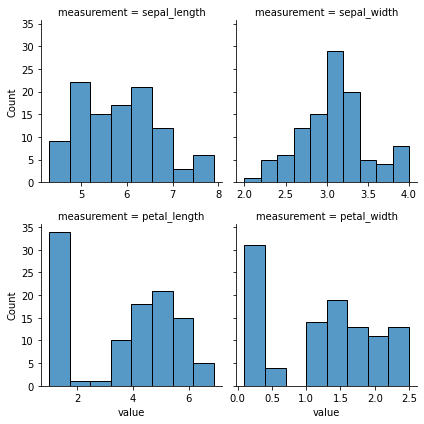

In [110]:
# need FacetGrid
#here we create it,specify the dataset and the subplot data
g = sns.FacetGrid(mlt,col="measurement",col_wrap=2,sharex=False)
#now we map the plotting function to apply (can use plt or sns here)
#2nd parameter is column to plot
g.map(sns.histplot,"value")

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


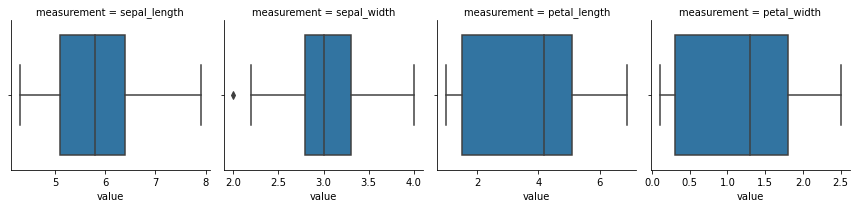

In [111]:
#now a boxplot of the same data
g = sns.FacetGrid(mlt,col="measurement",sharex=False)
g.map(sns.boxplot,"value")

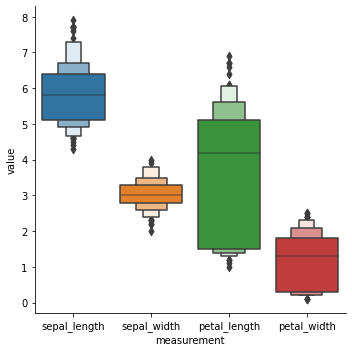

In [112]:
sns.catplot(data=mlt,y='value',x='measurement',kind='boxen')

#### Univariate notes:
- Equal number of observations per species
- Petal length and width have clear breaks in values on the lower end
- sepal length and width are fairly normal, but also have a break on the high side that seems to indicate a subset of higher values
- sepal width is most normal and may indicate a measurement with high overlap between species.

#### To investigate:
- Break out each of these by measurement and species.  Suspect some of these breaks correlate to species


#### Bivariate Stats:
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
- For each measurement type, compute the descriptive statistics for each species.
- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.
- Document takeaways & any actions.

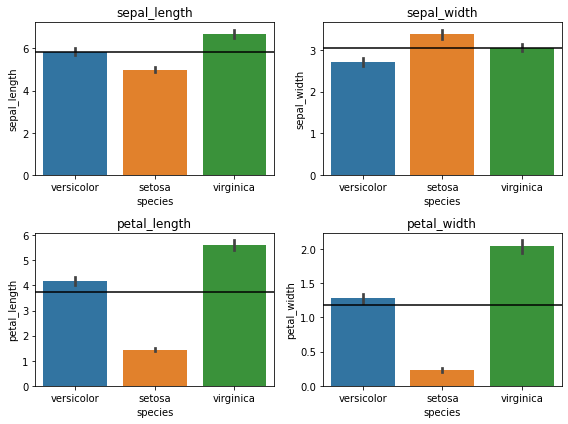

In [113]:
# plt.subplot(221)
# sns.barplot(tr,x='species',y='sepal')

#plot barplot of each measurement, broken out by species
# then add a horizontal line represeneting the mean of each measurement
plt.figure(figsize=(8,6))
ct = 0
for i in tr.columns[0:4]:
    ct +=1
    plt.subplot(2,2,ct)
    sns.barplot(data=tr,x='species',y=i)
    plt.axhline(y=tr[i].mean(),color='black')
    plt.title(i)
plt.tight_layout()

In [114]:
#Let's see descriptive statistics for each measurement by species
# Loop over measurement
for m in tr.columns[0:4]:
    #loop at species
    for s in tr.species.unique():
        print(f'\n\033[1m{s} - {m}\033[0m')
        print(tr[tr.species==s][m].describe())
        
    


versicolor - sepal_length
count    35.000000
mean      5.842857
std       0.510067
min       4.900000
25%       5.500000
50%       5.700000
75%       6.150000
max       6.800000
Name: sepal_length, dtype: float64

setosa - sepal_length
count    35.000000
mean      4.985714
std       0.343120
min       4.300000
25%       4.750000
50%       5.000000
75%       5.100000
max       5.800000
Name: sepal_length, dtype: float64

virginica - sepal_length
count    35.000000
mean      6.671429
std       0.617667
min       5.800000
25%       6.300000
50%       6.500000
75%       7.050000
max       7.900000
Name: sepal_length, dtype: float64

versicolor - sepal_width
count    35.000000
mean      2.705714
std       0.313371
min       2.000000
25%       2.500000
50%       2.700000
75%       2.900000
max       3.400000
Name: sepal_width, dtype: float64

setosa - sepal_width
count    35.000000
mean      3.368571
std       0.351276
min       2.300000
25%       3.100000
50%       3.400000
75%       3.650

In [185]:
# For virginica & versicolor: 
# Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) 
# to see if there is a significant difference between the two groups. 
# Do the same for the other measurement types.

#Distributions are not normal, so use Mann_Whitney to see if measurements of species are independent
for i in tr.columns[0:4]:
    #establish null hypothesis
    null_h = f"The probability of a randomly selected {i} of virginica is equal to a randomly selected {i} of versicolor"
    #run the mann-whiteny for this measurement
    u, p = stats.mannwhitneyu(tr[tr.species=='virginica'][i],tr[tr.species=='versicolor'][i])
    #print out the results - using alpha of .05
    eda.stats_result(p,null_h,u=u)
    


We reject the null hypothesis, p = 3.824168112927752e-07 | α = 0.05
  u: 1044.5
The null hypothesis was: The probability of a randomly selected sepal_length of virginica is equal to a randomly selected sepal_length of versicolor


We reject the null hypothesis, p = 1.6917324879661385e-05 | α = 0.05
  u: 976.5
The null hypothesis was: The probability of a randomly selected sepal_width of virginica is equal to a randomly selected sepal_width of versicolor


We reject the null hypothesis, p = 1.4446730965925913e-12 | α = 0.05
  u: 1215.0
The null hypothesis was: The probability of a randomly selected petal_length of virginica is equal to a randomly selected petal_length of versicolor


We reject the null hypothesis, p = 2.2193125126696403e-12 | α = 0.05
  u: 1208.5
The null hypothesis was: The probability of a randomly selected petal_width of virginica is equal to a randomly selected petal_width of versicolor



#### Bivariate takeaways:
- Setosa has very different petal measurements from the other species
- Versicolor and Virginica have the most similar measurements across the board.
  - However, the mann-whitney u test indicates that all measurements of those species vary in a statistically significant way (we rejected the null hypothesis that they were the same)

#### Multivariate Stats
- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col
- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).
- Document takeaways and any actions.

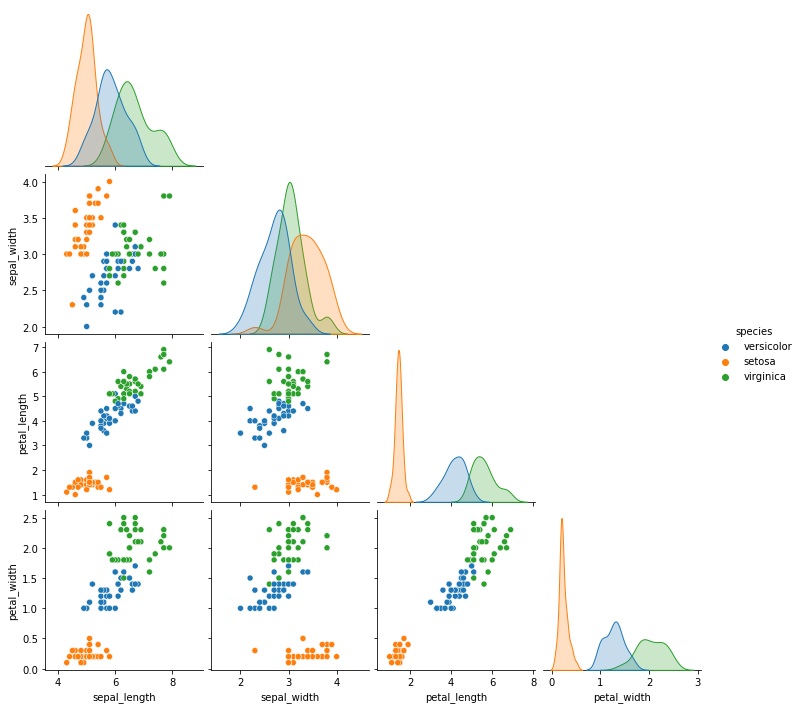

In [117]:
#compare each measurement, colorized w/ species
sns.pairplot(data=tr.iloc[:,0:5],hue="species",corner=True)

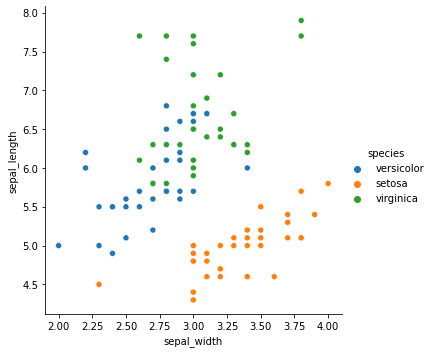

In [118]:
#Visualize two numeric variables by means of the species. 
#Hint: sns.relplot with hue or col
#Basically redo one of the smaller plots from pairplot.
#Chose sepal measurements as they were most similar across the species
sns.relplot(data=tr,x='sepal_width',y='sepal_length',hue='species')

<AxesSubplot:xlabel='measurement', ylabel='value'>

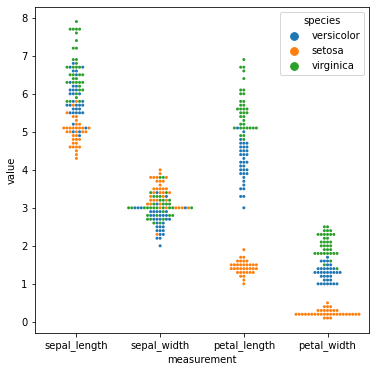

In [132]:
#Create a swarmplot using a melted dataframe of all your numeric variables.
# The x-axis should be the variable name, the y-axis the measure. 
# Add another dimension using color to represent species. 
# Document takeaways from this visualization
plt.figure(figsize=(6,6))
sns.swarmplot(data=mlt,x="measurement",y="value",hue="species",size=3)

- Confirms setosa has very different petal dimensions
- Shows stronger overlap of sepal measurements, especially sepal width.
- sepal length has greater overlap amont versicolor and virginica

In [137]:
#Ask a specific question of the data, such as: is the sepal area
# signficantly different in virginica compared to setosa? 
#Answer the question through both a plot and using a mann-whitney or t-test. 
#If you use a t-test, be sure assumptions are met
#  (independence, normality, equal variance).

#WE already answered the question I wanted to ask most:  
#  Are the measurements of versicolor and virginica different 
#  in a statistically significant way?

#So instead, I'll ask:
#  Is the sepal area significantly different between all the species
tr['sepal_area'] = tr.sepal_length*tr.sepal_width

<AxesSubplot:xlabel='sepal_area', ylabel='Count'>

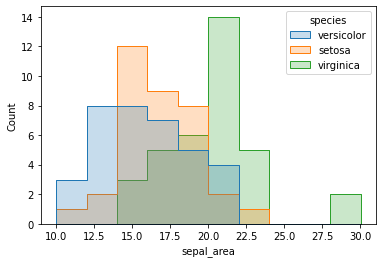

In [147]:
sns.histplot(tr,x='sepal_area',hue='species',element="step")

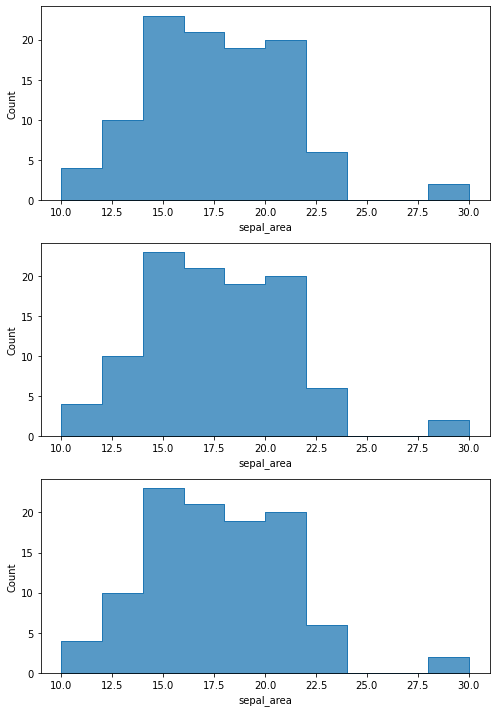

In [187]:
plt.figure(figsize=(7,10))
ct=0
for s in tr.species.unique():
    ct+=1
    plt.subplot(3,1,ct)
    sns.histplot(tr,x='sepal_area',element='step')
    
plt.tight_layout()

- Independent, normalish, variances seem close
- leaning towards anova


In [158]:
for s in tr.species.unique():
    print(f'{s} variance: {tr[tr.species==s].sepal_area.var()}')

versicolor variance: 8.177149243697478
setosa variance: 7.378164705882353
virginica variance: 9.725044033613445


In [180]:
combo = it.combinations(tr.species.unique(),2)
#run levene test on variances
for i in list(combo):
    a = i[0]
    b = i[1]
    tl, pl = stats.levene(tr[tr.species==a].sepal_area,tr[tr.species==b].sepal_area)
    print(f'Variances are equal: {pl > .05}: p={pl}')


Variances are equal: True: p=0.6699568882845879
Variances are equal: True: p=0.6545252728900834
Variances are equal: True: p=0.9192432494357223


In [184]:
#Levene says variances are equal, so continue with ANOVA
null_h="the 3 species have equal means for sepal_area"
f, p = stats.f_oneway(tr[tr.species=='versicolor'].sepal_area,tr[tr.species=='virginica'].sepal_area,tr[tr.species=='setosa'].sepal_area)
#use .05 as alpha
eda.stats_result(p,null_h,f=f)


We reject the null hypothesis, p = 5.1718513055789325e-09 | α = 0.05
The null hypothesis was: the 3 species have equal means for sepal_area

